In [58]:
import pymolpro
import pandas as pd


In [59]:
backend = 'local' 
project_name = 'HEAVY28_methodtest'
parallel = 8

In [60]:
methods = {"HF": "HF;counterpoise",
"MP2": "hf;MP2;counterpoise",
"MP3": "hf;MP3;counterpoise",
"MP4": "hf;MP4;counterpoise",
"PAPT2":"hf;PAPT;MP2;counterpoise",
"PAPT3":"hf;PAPT;MP3;counterpoise",
"PAPT4":"hf;PAPT;MP4;counterpoise",
"CCSD":"hf;CCSD;counterpoise",
"CCSD(T)":"hf;CCSD(T);counterpoise" }
bases = ['aug-cc-pVDZ-pp','aug-cc-pVDZ-pp']

In [61]:
db = pymolpro.database.load("GMTKN55_HEAVY28")
small=db.subset(open_shell=False,max_electrons=70)
print(small)

GMTKN55 HEAVY28 (closed shell only) (maximum number of electrons 70):

Molecules:
h2o: {'geometry': '           3\n  \n    O          0.00000000      0.00000000      0.39219533\n    H         -0.75610000      0.00000000     -0.19609767\n    H          0.75610000      0.00000000     -0.19609767\n', 'description': 'h2o'}
teh2_nh3: {'geometry': '           7\n  \n    TE        -0.27801386     -1.82151771      0.00000000\n    H          0.21816614     -3.38866571      0.00000000\n    H          1.27654414     -1.33346771      0.00000000\n    N         -0.27801386      1.35373929      0.00000000\n    H          0.15335914      1.77217829      0.81226000\n    H          0.15335914      1.77217829     -0.81226000\n    H         -1.24540086      1.64555529      0.00000000\n', 'description': 'teh2_nh3'}
sbh3: {'geometry': '           4\n  \n    SB         0.00000000      0.00000000      0.70962975\n    H         -0.69522101      1.20415811     -0.23654319\n    H         -0.69522101     -1.20415

In [62]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       backend=backend,
                                                       preamble="core,small", parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f077635b400>}, 'MP2': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f07efa27e20>}, 'MP3': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f077635ad70>}, 'MP4': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f0776dc7970>}, 'PAPT2': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f0776dc7a00>}, 'PAPT3': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f0776dc64a0>}, 'PAPT4': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f0776dc7070>}, 'CCSD': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f085fe5af50>}, 'CCSD(T)': {'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f07763516f0>}}


In [63]:
analyse=pymolpro.database.analyse([result['aug-cc-pVDZ-pp'] for result in results.values()],small)
analyse['reaction statistics']

,HF;COUNTERPOISE/aug-cc-pVDZ-pp,HF;MP2;COUNTERPOISE/aug-cc-pVDZ-pp,HF;MP3;COUNTERPOISE/aug-cc-pVDZ-pp,HF;MP4;COUNTERPOISE/aug-cc-pVDZ-pp,HF;PAPT;MP2;COUNTERPOISE/aug-cc-pVDZ-pp,HF;PAPT;MP3;COUNTERPOISE/aug-cc-pVDZ-pp,HF;PAPT;MP4;COUNTERPOISE/aug-cc-pVDZ-pp,HF;CCSD;COUNTERPOISE/aug-cc-pVDZ-pp,HF;CCSD(T);COUNTERPOISE/aug-cc-pVDZ-pp
MAD,0.002716,0.000563,0.000916,0.000647,0.001101,0.001104,0.000684,0.001094,0.000750
MAXD,0.003403,0.000676,0.001169,0.000803,0.001429,0.001427,0.000839,0.001361,0.000913
RMSD,0.002778,0.000572,0.000943,0.000672,0.001144,0.001147,0.000714,0.001135,0.000777
MSD,-0.002716,-0.000563,-0.000916,-0.000647,-0.001101,-0.001104,-0.000684,-0.001094,-0.000750
STDEVD,0.000676,0.000114,0.000262,0.000209,0.000359,0.000358,0.000236,0.000346,0.000237


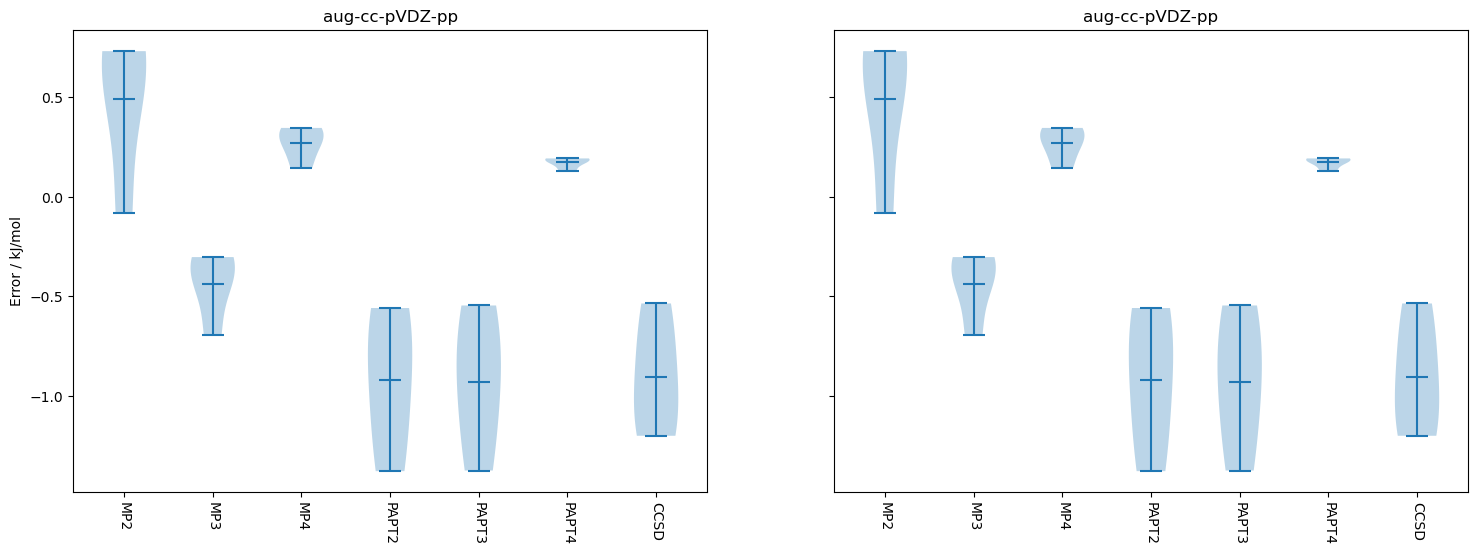

In [64]:
import matplotlib.pyplot as plt
import pandas 

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['aug-cc-pVDZ-pp','aug-cc-pVDZ-pp']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['aug-cc-pVDZ-pp'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")

df = pd.DataFrame(data)
df.to_excel("PAPT.xlsx")

In [ ]:
extrapolate=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())
extrapolate